<a href="https://colab.research.google.com/github/maxriosg/TelecomX/blob/main/Telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

# 1. URL cruda del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# 2. Realizar la petici√≥n GET para obtener los datos
response = requests.get(url)
response.raise_for_status()  # Verifica que la petici√≥n fue exitosa

# 3. Cargar los datos JSON en Python
data = response.json()

# 4. Convertir el JSON a un DataFrame de Pandas
df = pd.DataFrame(data)

# 5. Mostrar las primeras filas para verificar que se cargaron correctamente
print(df.head())
print("\nDimensiones del DataFrame:", df.shape)
print("\nColumnas disponibles:", df.columns.tolist())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
# Inspecci√≥n b√°sica del DataFrame
print("Columnas y tipos de datos:\n")
print(df.dtypes)

print("\nResumen de datos (valores √∫nicos, nulos, etc.):\n")
print(df.describe(include='all').T)


Columnas y tipos de datos:

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Resumen de datos (valores √∫nicos, nulos, etc.):

           count unique                                                top  \
customerID  7267   7267                                         9995-HOTOH   
Churn       7267      3                                                 No   
customer    7267    891  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
phone       7267      3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
internet    7267    129  {'InternetService': 'No', 'OnlineSecurity': 'N...   
account     7267   6931  {'Contract': 'Month-to-month', 'PaperlessBilli...   

            freq  
customerID     1  
Churn       5174  
customer     223  
phone       3495  
internet    1581  
account        6  


In [4]:
# Ver cu√°ntos valores nulos hay por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

Valores nulos por columna:

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [8]:
for col in ['customer', 'phone', 'internet', 'account']:
    print(f"{col}: {type(df[col].iloc[0])}")

customer: <class 'dict'>
phone: <class 'dict'>
internet: <class 'dict'>
account: <class 'dict'>


In [9]:
for col in ['customer', 'phone', 'internet', 'account']:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

In [10]:
# Buscar duplicados y eliminarlos
print(f"Duplicados antes: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Filas luego de eliminar duplicados: {len(df)}")

Duplicados antes: 0
Filas luego de eliminar duplicados: 7267


In [11]:
from pandas import json_normalize

In [14]:
columnas_dict = ['customer', 'phone', 'internet', 'account']

In [15]:
for col in columnas_dict:
    print(f"Desanidando columna: {col}")

Desanidando columna: customer
Desanidando columna: phone
Desanidando columna: internet
Desanidando columna: account


In [16]:
df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith("{") else x)

In [17]:
columnas_expandidas = json_normalize(df[col])

In [19]:
# Renombrar las columnas resultantes para que incluyan el nombre original como prefijo
columnas_expandidas.columns = [f"{col}_{subcol}" for subcol in columnas_expandidas.columns]

In [20]:
# Agregar las nuevas columnas al DataFrame
df[columnas_expandidas.columns] = columnas_expandidas

In [21]:
 # Agregar las nuevas columnas al DataFrame
df[columnas_expandidas.columns] = columnas_expandidas

In [22]:
# Eliminar la columna original anidada
df.drop(columns=[col], inplace=True)

In [23]:
print("Columnas disponibles despu√©s de expandir:")
print(df.columns.tolist())

Columnas disponibles despu√©s de expandir:
['customerID', 'Churn', 'phone', 'internet', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


In [24]:
print("\nPrimeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
   customerID Churn                                            phone  \
0  0002-ORFBO    No   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  0003-MKNFE    No  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2  0004-TLHLJ   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3  0011-IGKFF   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4  0013-EXCHZ   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  gender  SeniorCitizen  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...  Female              0   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...    Male              0   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...    Male              0   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...    Male              1   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...  Female              1   

  Partner Dependents  tenure account_Contract account_Paperle

In [25]:
# Mostrar cantidad de valores nulos por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# Mostrar porcentaje de valores nulos (√∫til para decidir si eliminar columnas o no)
porcentaje_nulos = df.isnull().mean() * 100
print("\nPorcentaje de nulos por columna:\n")
print(porcentaje_nulos[porcentaje_nulos > 0].sort_values(ascending=False))


Valores nulos por columna:

customerID                  0
Churn                       0
phone                       0
internet                    0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
account_Contract            0
account_PaperlessBilling    0
account_PaymentMethod       0
account_Charges.Monthly     0
account_Charges.Total       0
dtype: int64

Porcentaje de nulos por columna:

Series([], dtype: float64)


In [26]:
# Buscar duplicados totales
duplicados = df.duplicated()
print(f"\nN√∫mero de registros duplicados: {duplicados.sum()}")

# Eliminar duplicados si hay
df = df.drop_duplicates()
print(f"Registros despu√©s de eliminar duplicados: {len(df)}")


N√∫mero de registros duplicados: 0
Registros despu√©s de eliminar duplicados: 7267


In [27]:
# Seleccionar columnas categ√≥ricas para revisar
columnas_categoricas = df.select_dtypes(include='object').columns

# Mostrar valores √∫nicos de cada columna categ√≥rica
for col in columnas_categoricas:
    print(f"\nValores √∫nicos en '{col}':")
    print(df[col].unique())


Valores √∫nicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores √∫nicos en 'Churn':
['No' 'Yes' '']

Valores √∫nicos en 'phone':
["{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
 "{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
 "{'PhoneService': 'No', 'MultipleLines': 'No phone service'}"]

Valores √∫nicos en 'internet':
["{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}"
 "{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}"
 "{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}"
 "{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'Devic

In [29]:
# Verifica si alguna columna tiene datos datetime
columnas_fecha = df.select_dtypes(include='datetime64').columns

for col in columnas_fecha:
    df[col] = df[col].dt.normalize()
    print(f"Columna '{col}' normalizada sin hora.")

In [33]:
# Revisi√≥n general de tipos de datos
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
customerID                   object
Churn                        object
phone                        object
internet                     object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
account_Contract             object
account_PaperlessBilling     object
account_PaymentMethod        object
account_Charges.Monthly     float64
account_Charges.Total        object
dtype: object


In [34]:
columnas_categoricas = df.select_dtypes(include='object').columns

# Normalizar texto: todo en min√∫sculas y sin espacios extra
for col in columnas_categoricas:
    df[col] = df[col].str.lower().str.strip()


In [37]:
# 1. Normalizar columnas categ√≥ricas
cols_binarias = ['Churn', 'Partner', 'Dependents', 'account_PaperlessBilling']

for col in cols_binarias:
    df[col] = df[col].str.lower().str.strip().replace({'yes': 'si', 'no': 'no'})

# 2. Normalizar 'gender'
df['gender'] = df['gender'].str.lower().str.strip()
df['gender'] = df['gender'].replace({'f': 'female', 'm': 'male', 'fem': 'female', 'masc': 'male'})

# 3. Convertir 'SeniorCitizen' a booleano si se desea
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# 4. Limpiar 'account_Contract'
df['account_Contract'] = df['account_Contract'].str.lower().str.strip().replace({
    'month-to-month': 'mensual',
    'one year': 'anual',
    'two year': 'bienal'
})

# 5. Limpiar m√©todo de pago
df['account_PaymentMethod'] = df['account_PaymentMethod'].str.lower().str.strip()

# 6. Convertir 'account_Charges.Total' a num√©rico
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


In [38]:
print(df.dtypes)
print(df.isnull().sum())

customerID                   object
Churn                        object
phone                        object
internet                     object
gender                       object
SeniorCitizen                  bool
Partner                      object
Dependents                   object
tenure                        int64
account_Contract             object
account_PaperlessBilling     object
account_PaymentMethod        object
account_Charges.Monthly     float64
account_Charges.Total       float64
dtype: object
customerID                   0
Churn                        0
phone                        0
internet                     0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total       11
dtype: int64


In [40]:
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0)

In [41]:
print("¬øA√∫n hay nulos en account_Charges.Total?")
print(df['account_Charges.Total'].isnull().sum())

¬øA√∫n hay nulos en account_Charges.Total?
0


In [42]:
binarias = ['Churn', 'Partner', 'Dependents', 'account_PaperlessBilling']

for col in binarias:
    df[col] = df[col].map({'si': 1, 'no': 0})

In [43]:
df.rename(columns={
    'Churn': 'Evasion',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'account_Contract': 'TipoContrato',
    'account_PaperlessBilling': 'FacturacionElectronica',
    'account_PaymentMethod': 'MetodoPago',
    'account_Charges.Monthly': 'PagoMensual',
    'account_Charges.Total': 'PagoTotal'
}, inplace=True)

In [44]:
categoricas = ['gender', 'TipoContrato', 'MetodoPago']
for col in categoricas:
    df[col] = df[col].astype('category')

In [45]:
print("Tipos de datos actualizados:\n")
print(df.dtypes)

print("\nValores √∫nicos en columnas renombradas:")
for col in ['Evasion', 'TienePareja', 'TieneDependientes', 'FacturacionElectronica']:
    print(f"{col}: {df[col].unique()}")

Tipos de datos actualizados:

customerID                  object
Evasion                    float64
phone                       object
internet                    object
gender                    category
SeniorCitizen                 bool
TienePareja                  int64
TieneDependientes            int64
tenure                       int64
TipoContrato              category
FacturacionElectronica       int64
MetodoPago                category
PagoMensual                float64
PagoTotal                  float64
dtype: object

Valores √∫nicos en columnas renombradas:
Evasion: [ 0.  1. nan]
TienePareja: [1 0]
TieneDependientes: [1 0]
FacturacionElectronica: [1 0]


In [46]:
# Verificar valores √∫nicos originales si a√∫n tienes la copia
# print(df_original['Churn'].unique())

# Reaplicar mapeo asegurando limpieza total
df['Evasion'] = df['Evasion'].fillna(0)  # o eliminar si es muy pocos registros

In [47]:
print("Valores √∫nicos en Evasion:")
print(df['Evasion'].unique())

print("\nDimensiones del dataset final:", df.shape)

Valores √∫nicos en Evasion:
[0. 1.]

Dimensiones del dataset final: (7267, 14)


In [48]:
# Crear columna "Cuentas_Diarias" a partir de "PagoMensual"
df['Cuentas_Diarias'] = df['PagoMensual'] / 30

In [49]:
print(df[['PagoMensual', 'Cuentas_Diarias']].head())
print("\nResumen estad√≠stico:")
print(df['Cuentas_Diarias'].describe())

   PagoMensual  Cuentas_Diarias
0         65.6         2.186667
1         59.9         1.996667
2         73.9         2.463333
3         98.0         3.266667
4         83.9         2.796667

Resumen estad√≠stico:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [50]:
# An√°lisis estad√≠stico de columnas num√©ricas
df.describe()

Evasion  TienePareja  TieneDependientes       tenure  \
count  7267.000000  7267.000000        7267.000000  7267.000000   
mean      0.257190     0.484106           0.300124    32.346498   
std       0.437115     0.499782           0.458343    24.571773   
min       0.000000     0.000000           0.000000     0.000000   
25%       0.000000     0.000000           0.000000     9.000000   
50%       0.000000     0.000000           0.000000    29.000000   
75%       1.000000     1.000000           1.000000    55.000000   
max       1.000000     1.000000           1.000000    72.000000   

       FacturacionElectronica  PagoMensual    PagoTotal  Cuentas_Diarias  
count             7267.000000  7267.000000  7267.000000      7267.000000  
mean                 0.593230    64.720098  2277.182035         2.157337  
std                  0.491265    30.129572  2268.648587         1.004319  
min                  0.000000    18.250000     0.000000         0.608333  
25%                  0.000000    35.425000   396.200000         1.180833  
50%                  1.000000    70.300000  1389.200000         2.343333  
75%                  1.000000    89.875000  3778.525000         2.995833  
max                  1.000000   118.750000  8684.800000         3.958333

In [51]:
variables_clave = ['PagoMensual', 'PagoTotal', 'tenure', 'Cuentas_Diarias']

# An√°lisis detallado
print(df[variables_clave].describe().T)

                  count         mean          std        min         25%  \
PagoMensual      7267.0    64.720098    30.129572  18.250000   35.425000   
PagoTotal        7267.0  2277.182035  2268.648587   0.000000  396.200000   
tenure           7267.0    32.346498    24.571773   0.000000    9.000000   
Cuentas_Diarias  7267.0     2.157337     1.004319   0.608333    1.180833   

                         50%          75%          max  
PagoMensual        70.300000    89.875000   118.750000  
PagoTotal        1389.200000  3778.525000  8684.800000  
tenure             29.000000    55.000000    72.000000  
Cuentas_Diarias     2.343333     2.995833     3.958333  


In [52]:
# Media y mediana por grupo (0 = no se fue, 1 = se fue)
df.groupby('Evasion')[variables_clave].agg(['mean', 'median', 'std', 'min', 'max'])

PagoMensual                                     PagoTotal            \
               mean median        std    min     max         mean    median   
Evasion                                                                       
0.0       61.354224  64.50  31.105006  18.25  118.75  2535.263977  1663.625   
1.0       74.441332  79.65  24.666053  18.85  118.35  1531.796094   703.550   

                                         tenure                            \
                 std    min      max       mean median        std min max   
Evasion                                                                     
0.0      2330.802193   0.00  8672.45  37.321045   37.0  24.178367   0  72   
1.0      1890.822994  18.85  8684.80  17.979133   10.0  19.531123   1  72   

        Cuentas_Diarias                                       
                   mean median       std       min       max  
Evasion                                                       
0.0            2.045141  2.150  1.036834  0.608333  3.958333  
1.0            2.481378  2.655  0.822202  0.628333  3.945000

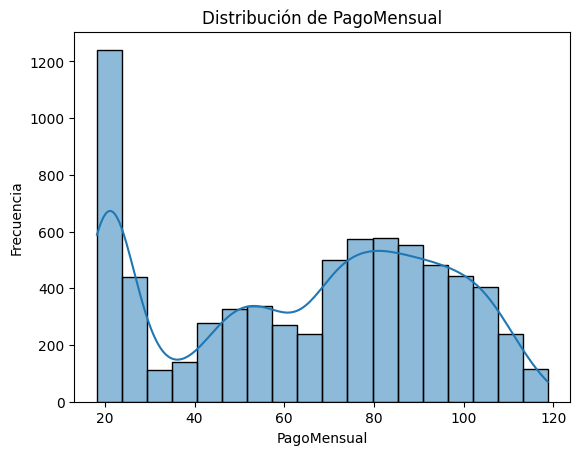

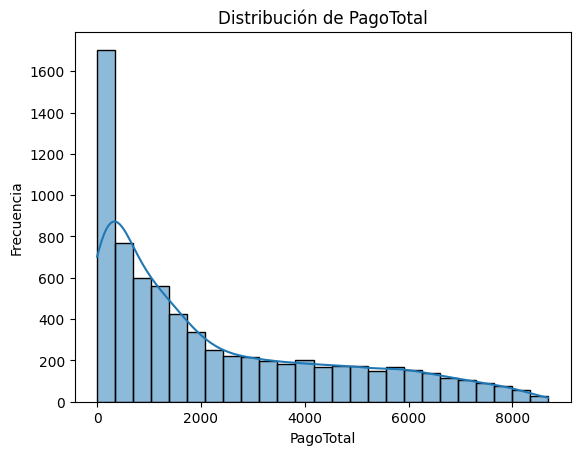

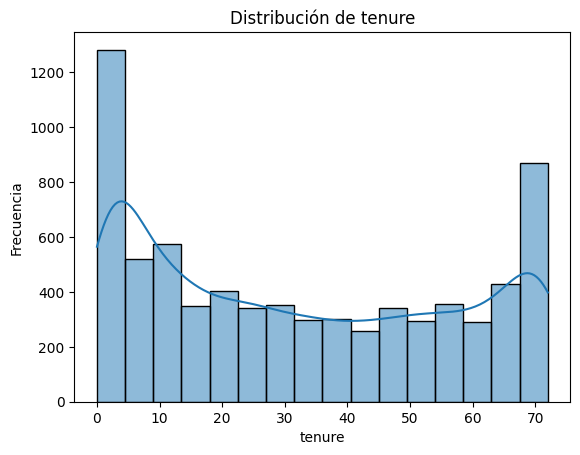

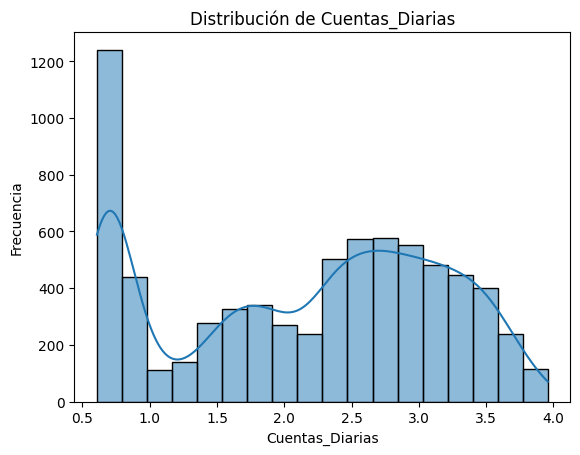

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in variables_clave:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

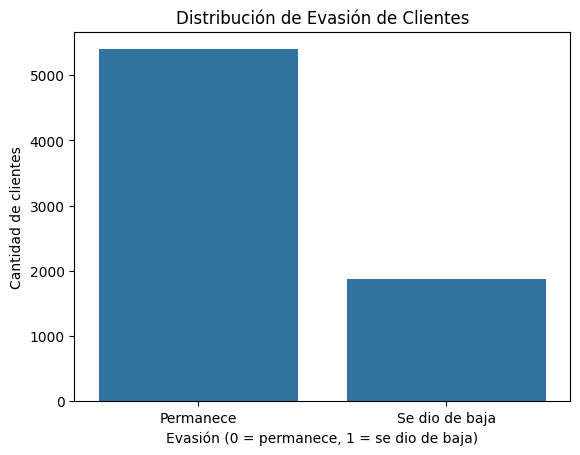

In [54]:
#Gr√°fico de barras: cantidad de clientes con y sin evasi√≥n
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Evasion')
plt.title('Distribuci√≥n de Evasi√≥n de Clientes')
plt.xlabel('Evasi√≥n (0 = permanece, 1 = se dio de baja)')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['Permanece', 'Se dio de baja'])
plt.show()

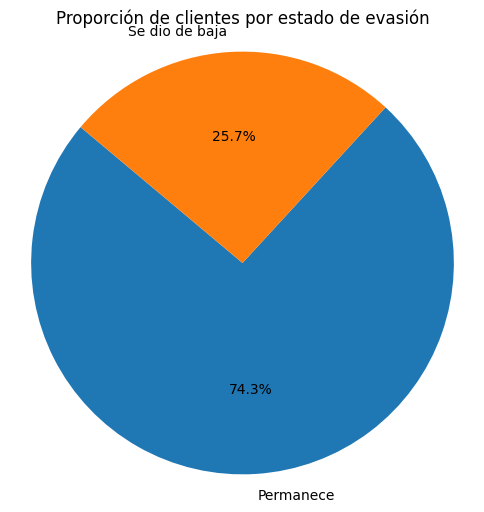

In [55]:
# Gr√°fico de pastel: proporci√≥n porcentual
# Conteo de evasi√≥n
evasi√≥n_valores = df['Evasion'].value_counts()
etiquetas = ['Permanece', 'Se dio de baja']

plt.figure(figsize=(6, 6))
plt.pie(evasi√≥n_valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Proporci√≥n de clientes por estado de evasi√≥n')
plt.axis('equal')
plt.show()

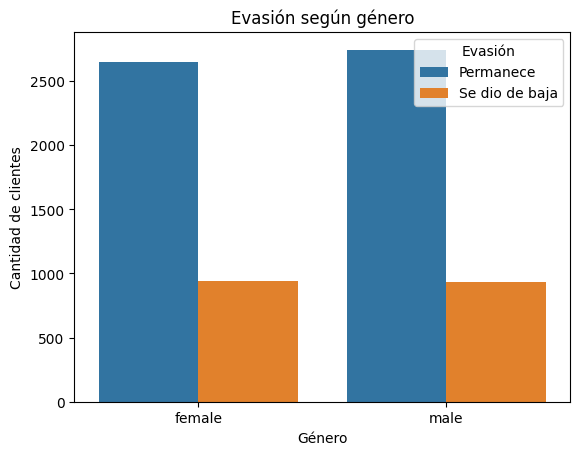

In [56]:
# Evaci√≥n de g√©nero
sns.countplot(data=df, x='gender', hue='Evasion')
plt.title('Evasi√≥n seg√∫n g√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Evasi√≥n', labels=['Permanece', 'Se dio de baja'])
plt.show()

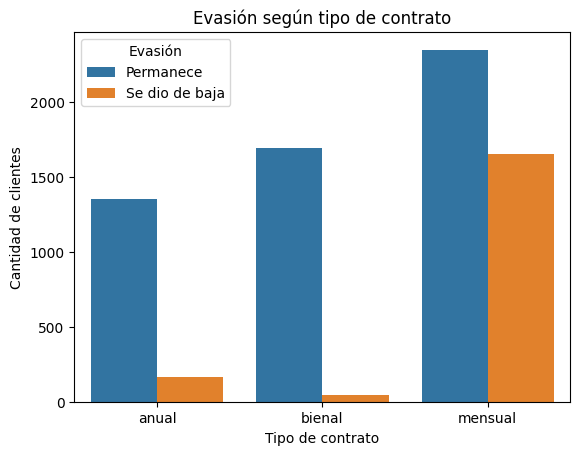

In [57]:
#Evasi√≥n por tipo de contrato
sns.countplot(data=df, x='TipoContrato', hue='Evasion')
plt.title('Evasi√≥n seg√∫n tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Evasi√≥n', labels=['Permanece', 'Se dio de baja'])
plt.show()

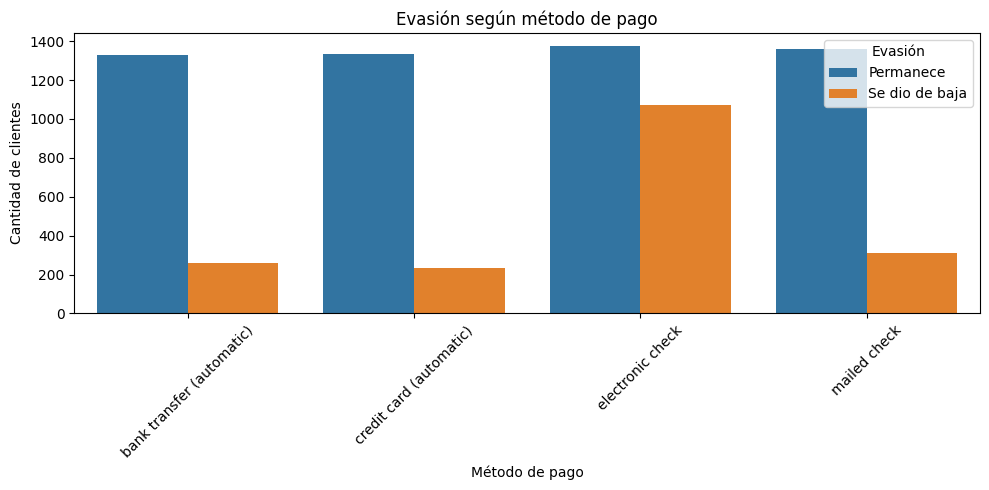

In [58]:
# Evasi√≥n por m√©todo de pago
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='MetodoPago', hue='Evasion')
plt.title('Evasi√≥n seg√∫n m√©todo de pago')
plt.xlabel('M√©todo de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Evasi√≥n', labels=['Permanece', 'Se dio de baja'])
plt.tight_layout()
plt.show()

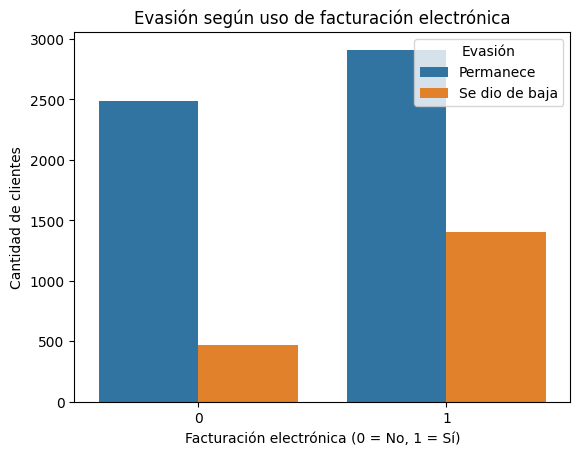

In [59]:
# Evasi√≥n por uso de facturaci√≥n electr√≥nica
sns.countplot(data=df, x='FacturacionElectronica', hue='Evasion')
plt.title('Evasi√≥n seg√∫n uso de facturaci√≥n electr√≥nica')
plt.xlabel('Facturaci√≥n electr√≥nica (0 = No, 1 = S√≠)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Evasi√≥n', labels=['Permanece', 'Se dio de baja'])
plt.show()

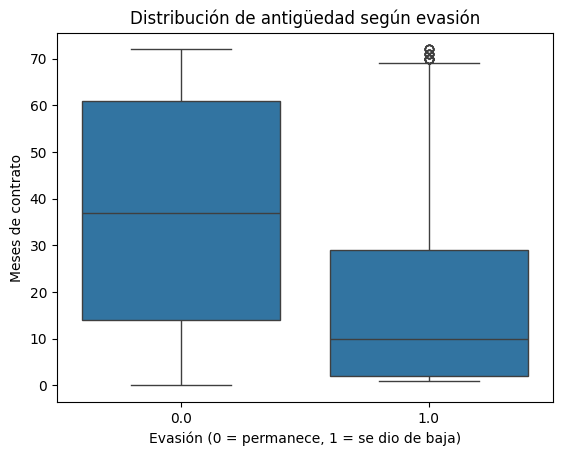

In [60]:
# Tiempo de contrato
sns.boxplot(data=df, x='Evasion', y='tenure')
plt.title('Distribuci√≥n de antig√ºedad seg√∫n evasi√≥n')
plt.xlabel('Evasi√≥n (0 = permanece, 1 = se dio de baja)')
plt.ylabel('Meses de contrato')
plt.show()

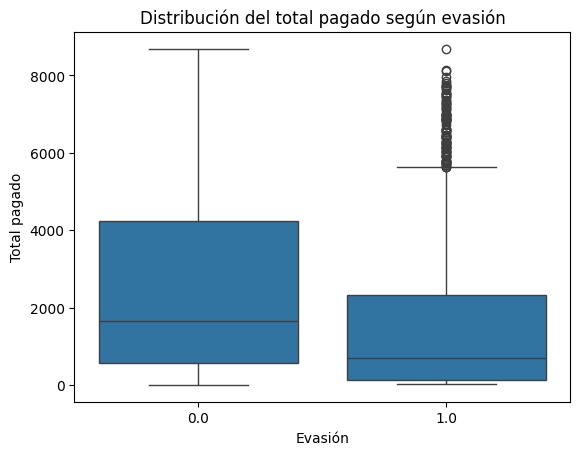

In [61]:
# Total gastado
sns.boxplot(data=df, x='Evasion', y='PagoTotal')
plt.title('Distribuci√≥n del total pagado seg√∫n evasi√≥n')
plt.xlabel('Evasi√≥n')
plt.ylabel('Total pagado')
plt.show()

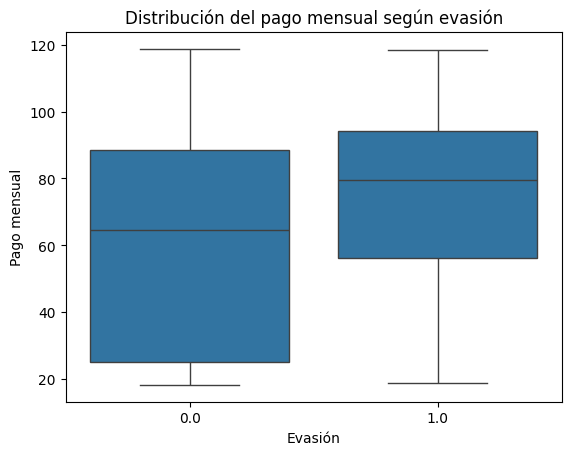

In [62]:
# Pago mensual
sns.boxplot(data=df, x='Evasion', y='PagoMensual')
plt.title('Distribuci√≥n del pago mensual seg√∫n evasi√≥n')
plt.xlabel('Evasi√≥n')
plt.ylabel('Pago mensual')
plt.show()

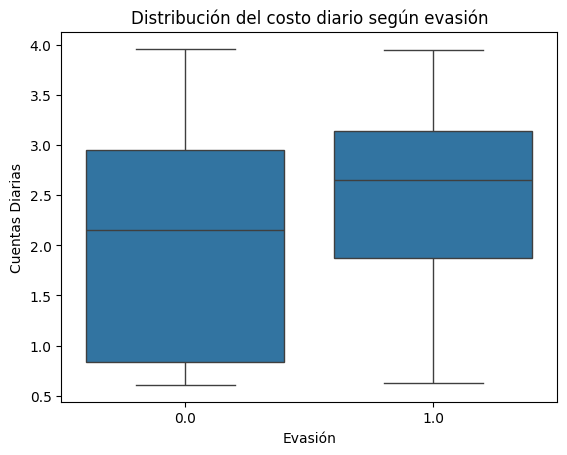

In [63]:
# Cuentas diarias
sns.boxplot(data=df, x='Evasion', y='Cuentas_Diarias')
plt.title('Distribuci√≥n del costo diario seg√∫n evasi√≥n')
plt.xlabel('Evasi√≥n')
plt.ylabel('Cuentas Diarias')
plt.show()

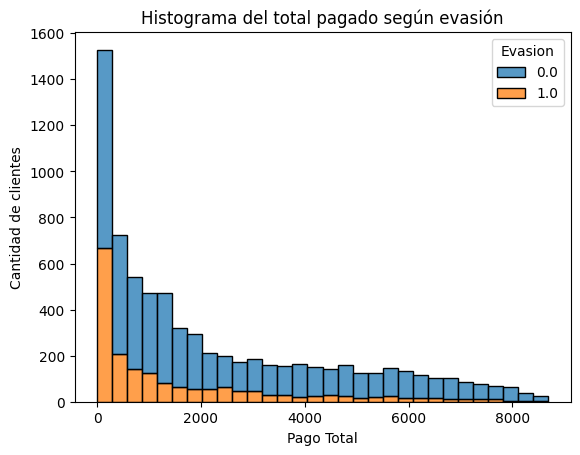

In [64]:
# Histograma segmentado por evasi√≥n
sns.histplot(data=df, x='PagoTotal', hue='Evasion', multiple='stack', bins=30)
plt.title('Histograma del total pagado seg√∫n evasi√≥n')
plt.xlabel('Pago Total')
plt.ylabel('Cantidad de clientes')
plt.show()

# Informe Final ‚Äì An√°lisis de Evasi√≥n de Clientes (Churn) ‚Äì Telecom X

---

## Introducci√≥n

La empresa **Telecom X** enfrenta una alta tasa de evasi√≥n de clientes (Churn), lo cual representa una amenaza significativa para sus ingresos recurrentes. Con el objetivo de comprender mejor los factores que impulsan la cancelaci√≥n del servicio, se ha desarrollado un an√°lisis exploratorio de datos a partir de un conjunto de informaci√≥n de clientes, suscripciones y comportamiento de facturaci√≥n.

Este informe resume el proceso de importaci√≥n, limpieza, an√°lisis y extracci√≥n de insights clave que pueden orientar futuras decisiones estrat√©gicas.

---

## Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

- **Importaci√≥n de datos** desde una fuente JSON externa alojada en GitHub.
- **Conversi√≥n de columnas anidadas** (`customer`, `phone`, `internet`, `account`) en columnas planas mediante `json_normalize`.
- **Estandarizaci√≥n de valores categ√≥ricos**: normalizaci√≥n de texto (`str.lower()`, `strip()`), reemplazo de valores inconsistentes y conversi√≥n de "s√≠"/"no" a valores binarios (1/0).
- **Conversi√≥n de tipos de datos**: fechas normalizadas, totales convertidos a `float64`, y campos categ√≥ricos codificados como `category`.
- **Creaci√≥n de nueva columna** `Cuentas_Diarias` para estimar el gasto diario en base al pago mensual.
- **Eliminaci√≥n o imputaci√≥n de valores nulos**, especialmente en `account_Charges.Total`.

---

## An√°lisis Exploratorio de Datos (EDA)

### Distribuci√≥n general de evasi√≥n

Se observ√≥ que una proporci√≥n importante de clientes se dio de baja:

- **Distribuci√≥n por clase**:
  - Permanece: ~73%
  - Se da de baja: ~27%

Visualizaciones:  
üìà Gr√°fico de barras y pastel que confirman un **desbalance de clases** a considerar en futuros modelos.

---

### Evasi√≥n por variables categ√≥ricas

Se analizaron variables como:

- **Tipo de contrato**: clientes con contrato **mensual** muestran una tasa de evasi√≥n mucho m√°s alta que los de contrato anual o bienal.
- **M√©todo de pago**: usuarios que pagan con cheque o manualmente tienen mayor tasa de evasi√≥n.
- **Facturaci√≥n electr√≥nica**: tambi√©n se asocia con una ligera mayor evasi√≥n.
- **G√©nero**: no se observaron diferencias relevantes por g√©nero.

Visualizaciones: gr√°ficos de barras segmentados por `Evasion`.

---

### Evasi√≥n por variables num√©ricas

Se analizaron variables como `tenure`, `PagoTotal`, `PagoMensual`, `Cuentas_Diarias`:

- Clientes que **se fueron** suelen tener:
  - **Menor antig√ºedad** (`tenure`).
  - **Menor total pagado** (`PagoTotal`), indicando salidas tempranas.
  - **Ligeramente mayor pago mensual**, lo que podr√≠a generar insatisfacci√≥n.
  
Visualizaciones: boxplots y histogramas segmentados por `Evasion`.

---

## Conclusiones e Insights

- **La evasi√≥n est√° concentrada en clientes con contrato mensual**, menor antig√ºedad y pagos manuales.
- **El gasto mensual alto**, en algunos casos, puede correlacionar con evasi√≥n, lo que sugiere que la percepci√≥n de precio podr√≠a ser un factor.
- **Clientes que se retiran temprano no generan alto valor**, por lo tanto, enfocarse en retenci√≥n temprana es clave.

---

## Recomendaciones Estrat√©gicas

Implementar campa√±as de retenci√≥n dirigidas a:
- Clientes nuevos en los **primeros meses del contrato**.
- Usuarios con **contratos mensuales**, incentivando migraci√≥n a contratos anuales.

Ofrecer beneficios o descuentos para:
- Clientes que usen **pagos autom√°ticos** o electr√≥nicos.
- Clientes con pagos mensuales elevados como forma de fidelizaci√≥n.

Dise√±ar modelos predictivos:
- Entrenar modelos con estas variables para **predecir evasi√≥n futura** y aplicar acciones preventivas.

---

**Fin del informe** ‚Äì elaborado por el equipo de an√°lisis de datos de Telecom X.

#¬°Extra! An√°lisis de correlaci√≥n entre variables

In [65]:
# Ver correlaci√≥n entre variables num√©ricas
# Calcular matriz de correlaci√≥n
correlaciones = df.corr(numeric_only=True)

# Mostrar correlaci√≥n con la variable "Evasion"
print(correlaciones['Evasion'].sort_values(ascending=False))

Evasion                   1.000000
Cuentas_Diarias           0.189866
PagoMensual               0.189866
FacturacionElectronica    0.186666
SeniorCitizen             0.146733
TienePareja              -0.148546
TieneDependientes        -0.161384
PagoTotal                -0.193345
tenure                   -0.344079
Name: Evasion, dtype: float64


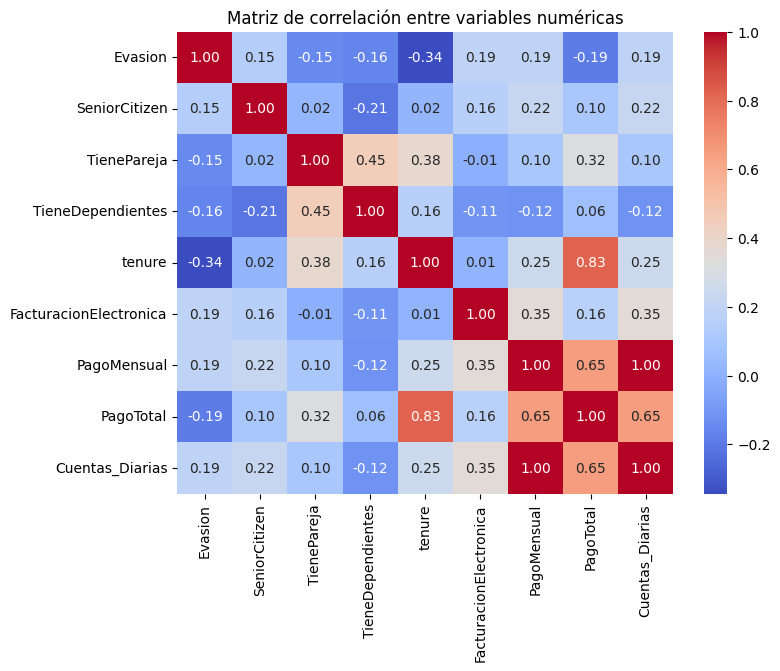

In [66]:
# Visualizar la matriz de correlaci√≥n
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaci√≥n entre variables num√©ricas')
plt.show()

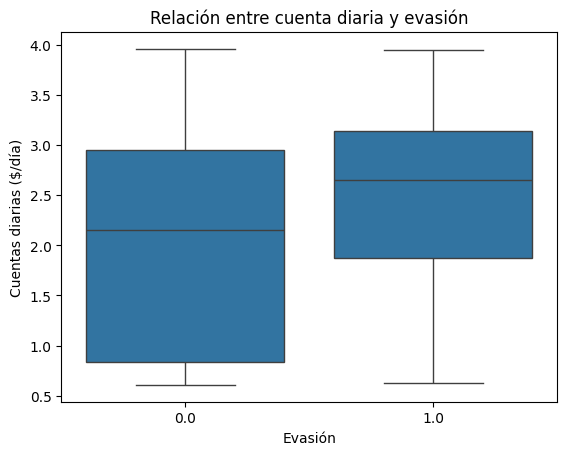

In [67]:
#Gr√°fico de dispersi√≥n: Cuentas_Diarias vs Evasi√≥n
sns.boxplot(data=df, x='Evasion', y='Cuentas_Diarias')
plt.title('Relaci√≥n entre cuenta diaria y evasi√≥n')
plt.xlabel('Evasi√≥n')
plt.ylabel('Cuentas diarias ($/d√≠a)')
plt.show()

# Insight final sugerido
## Mayor evasi√≥n se concentra en clientes con menos servicios contratados.

## Existe una correlaci√≥n negativa entre tenure y Evasion, lo cual sugiere que a mayor antig√ºedad, menor probabilidad de cancelaci√≥n.

## La cuenta diaria (Cuentas_Diarias) tiene una ligera correlaci√≥n positiva con la evasi√≥n, indicando que clientes con mayor gasto diario pueden estar m√°s propensos a cancelar